In [16]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [17]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [18]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [19]:
# moist['Time'].head()


In [20]:
moist = moist.set_index('Time')
# moist.head()


In [21]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-14 01:27:46,12.8125,24.8962,24
2019-06-14 01:28:46,12.8750,24.5441,24
2019-06-14 01:29:47,12.8750,24.8509,24
2019-06-14 01:30:48,12.9062,24.2389,24
2019-06-14 01:31:49,12.9375,24.5473,24


In [22]:
import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [23]:
# moist['2019-06-01 14:00':].Humidity.plot(legend=True)
# moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

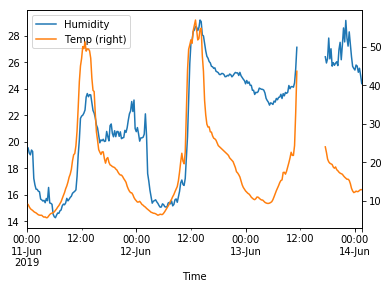

In [24]:
import datetime
hstart = datetime.datetime.now() - datetime.timedelta(3)
hstr = hstart.strftime('%Y-%m-%d')
hourly = moist.resample('15Min').mean()
hourly[hstr:].Humidity.plot(legend=True)
hourly[hstr:].Temp.plot(secondary_y=True,legend=True)


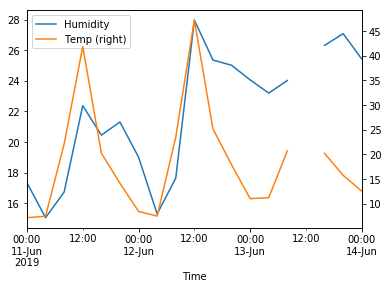

In [25]:
daily = moist.resample('4h').mean()
daily[hstr:].Humidity.plot(legend=True)
daily[hstr:].Temp.plot(secondary_y=True,legend=True)


In [26]:
submoist=moist[hstr:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
trendStart = submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3

# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600*daysfcst)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.22000000e+11]
 [  1.83000000e+11]
 ..., 
 [  2.64572000e+14]
 [  2.64633000e+14]
 [  2.64694000e+14]] 2.64694e+14
[[  2.64694000e+14]]


In [27]:
from sklearn import datasets, linear_model
import numpy as np

fdate=submoist.index.max() + datetime.timedelta(daysfcst)

regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)


2.64694e+14 
 264694000864000.0
New future time	 2019-06-17 01:31:49 
predicted	 [ 27.36777072] 
slope	 [  4.08280582e-14]


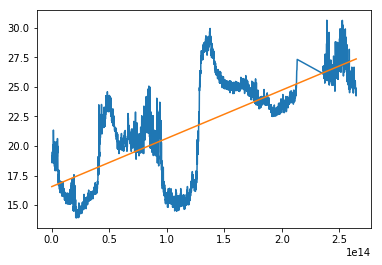

In [28]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))

In [29]:
#from datetime import datetime
#print(datetime.datetime.now().timestamp)
# print(datetime.now())

In [30]:
from datetime import datetime,timedelta
startDate = datetime.now()-timedelta(2)
print (startDate.strftime('%Y-%m-%d'),'\n\n')

strtDate =startDate.strftime('%Y-%m-%d')

submoist=moist[strtDate:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3
fdate = (datetime.now() + timedelta(daysfcst)).strftime('%Y-%m-%d')

tt1=tf.Time.values.astype('float64').reshape(-1,1)

from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(tt1,m)
mtmro=mt.max()+(24*3600*daysfcst)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)



2019-06-12 


2.64694e+14 
 264694000259200.0
New future time	 2019-06-17 
predicted	 [ 32.32324883] 
slope	 [  5.03488508e-14]
